# 📘 07_live_api_comparison.ipynb

# Fetch real-time traffic data from APIs (e.g., Google Maps) and compare with model predictions.


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.live_api_comparison import run_live_comparison


In [ ]:
input_path = r"C:\Users\VaishnaviM\Desktop\BIG_DATA\data\processed\clustered_trip_data.parquet"
output_csv = r"C:\Users\VaishnaviM\Desktop\BIG_DATA\outputs\predictions\live_vs_predicted.csv"
sample_count = 400 


In [3]:
run_live_comparison(
    input_path=input_path,
    output_csv=output_csv,
    n_samples=sample_count
)


Loading 400 random trips from C:\Users\VaishnaviM\Desktop\BIG_DATA\data\processed\clustered_trip_data.parquet
Comparing predicted vs live traffic speed...
API error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
API error: HTTPSConnectionPool(host='api.openrouteservice.org', port=443): Read timed out. (read timeout=None)
API error: ('Connection aborted.', ConnectionAbortedError(10053, 'An established connection was aborted by the software in your host machine', None, 10053, None))
Results saved to C:\Users\VaishnaviM\Desktop\BIG_DATA\outputs\predictions\live_vs_predicted.csv
       predicted_speed  live_speed       error         lat         lon
count       394.000000  394.000000  394.000000  394.000000  394.000000
mean         10.204612   19.216576    9.451823   40.748448  -73.964155
std           5.590909    4.918373    4.870066    0.033989    0.053021
min           0.401753    3.035847    0.149014   40.639832  -74.015999
25%           6.

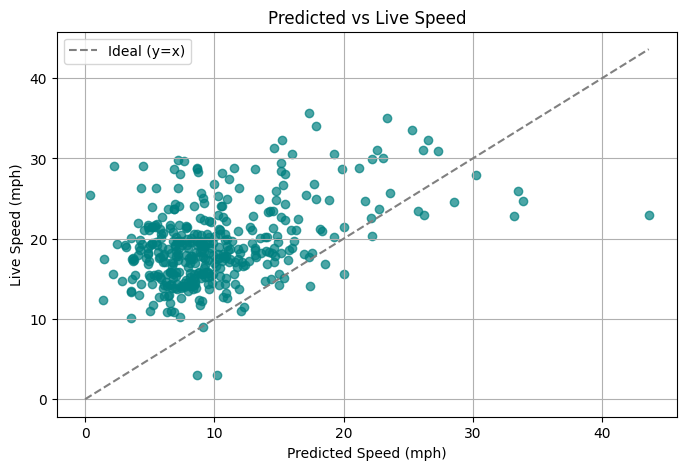

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(output_csv)

# Scatter plot: predicted vs live
plt.figure(figsize=(8, 5))
plt.scatter(df['predicted_speed'], df['live_speed'], color='teal', alpha=0.7)
plt.plot([0, max(df['predicted_speed'].max(), df['live_speed'].max())],
         [0, max(df['predicted_speed'].max(), df['live_speed'].max())],
         linestyle='--', color='gray', label='Ideal (y=x)')

plt.xlabel('Predicted Speed (mph)')
plt.ylabel('Live Speed (mph)')
plt.title('Predicted vs Live Speed')
plt.legend()
plt.grid(True)
plt.show()
